
#**Regresión Logística**

Técnica probabilística de clasificación discriminante que permite predecir la probabilidad de obtener una variable categórica dada una combinación lineal en el espacio de entrada


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Dataset Digits

In [67]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

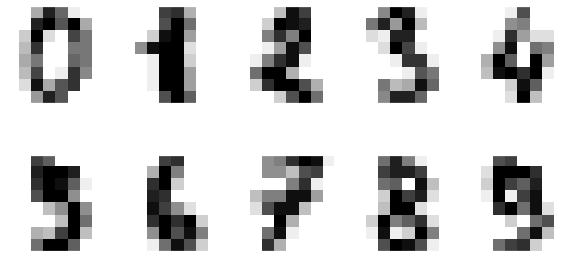

In [68]:
fig = plt.figure(figsize=(10, 5))  # tamaño en pulgadas
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

## División de datos en entrenamiento y prueba


In [69]:
from sklearn.model_selection import train_test_split
#por defecto: 0.75 train - 0.25 test
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0)

## Configuración del clasificador

In [70]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter = 5000) #lr=0.0001

## Entrenamiento

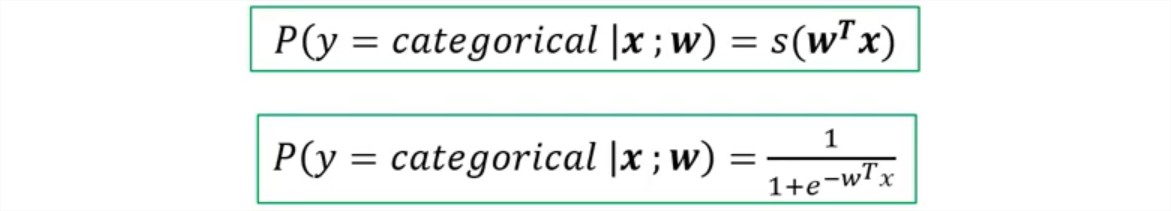

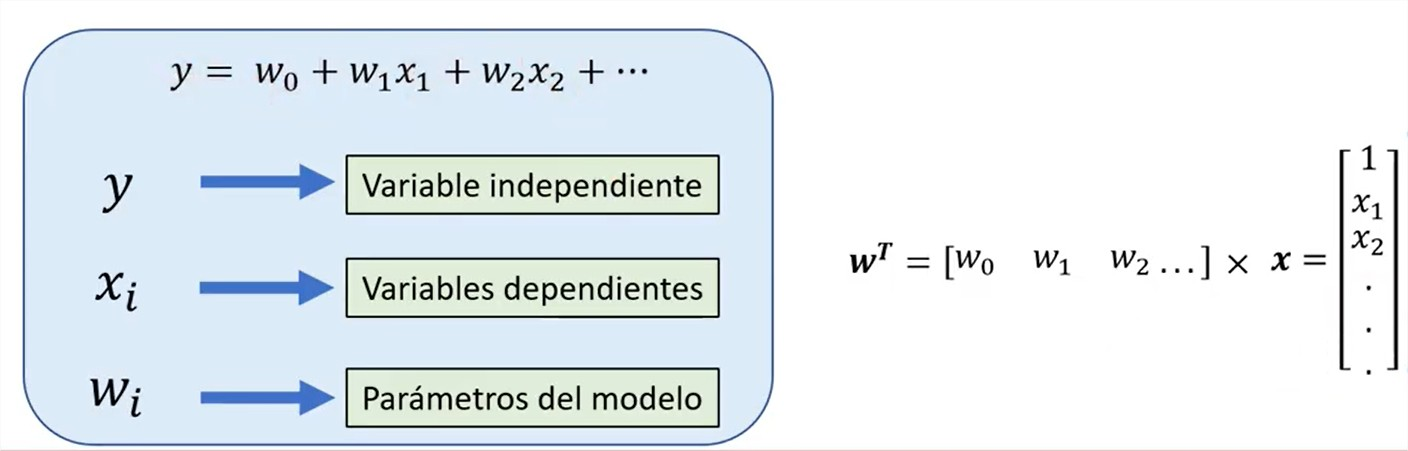

### Función de verosimilitud

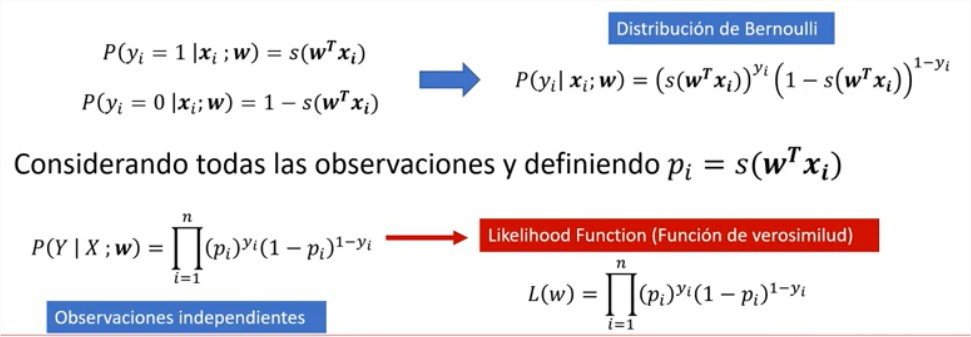

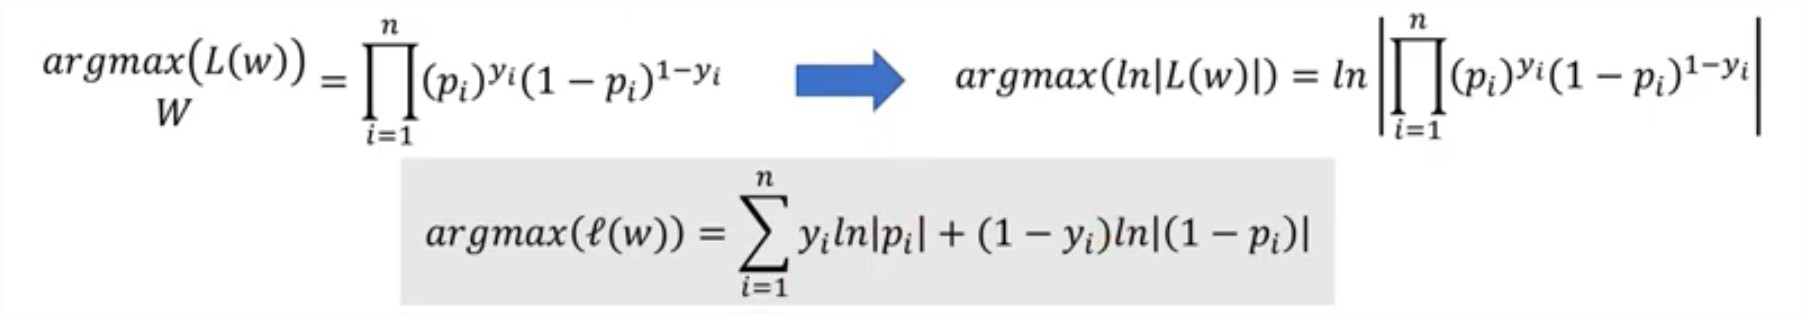

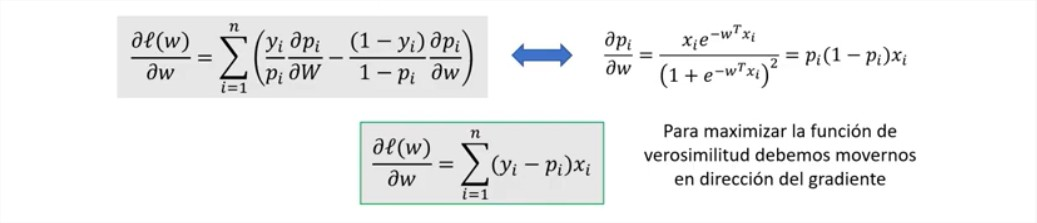

### Actualización de parámetros

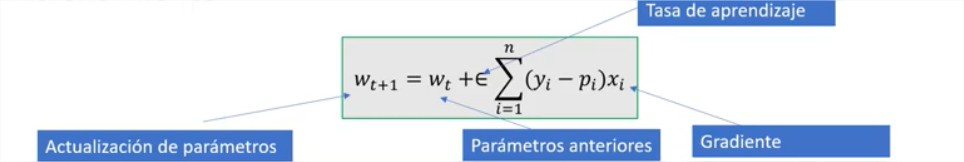

In [72]:
logisticRegr.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicción

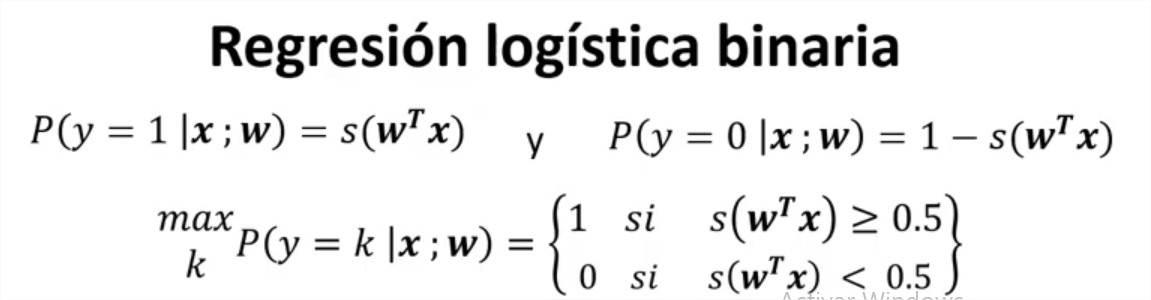

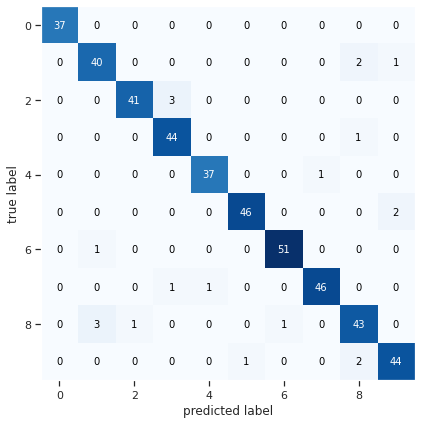

In [73]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
ypred = logisticRegr.predict(Xtest)
matriz = confusion_matrix(ytest,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

# 2. Dataset IRIS 

In [74]:
from sklearn.datasets import load_iris

# cargamos el dataset
iris = load_iris()

# Imprimimos especies y características
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [75]:
# Creamos dataframe para ver los datos
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.loc[0:150:10]

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
20,5.4,3.4,1.7,0.2,0
30,4.8,3.1,1.6,0.2,0
40,5.0,3.5,1.3,0.3,0
50,7.0,3.2,4.7,1.4,1
60,5.0,2.0,3.5,1.0,1
70,5.9,3.2,4.8,1.8,1
80,5.5,2.4,3.8,1.1,1
90,5.5,2.6,4.4,1.2,1


## División de datos en entrenamiento y prueba

In [76]:
X = data.drop(["species"],axis = 1)
y = data.species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Clasificador

In [77]:
from sklearn.linear_model import LogisticRegression

logisticRegrIris = LogisticRegression(max_iter=1000)

## Entrenamiento

In [78]:
logisticRegrIris.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicción

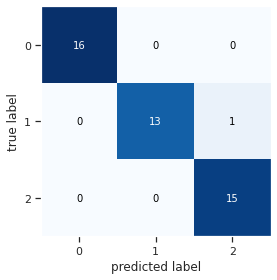

In [79]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
ypred = logisticRegrIris.predict(X_test)
matriz = confusion_matrix(y_test,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.tight_layout()